# Support Vector Machine 

#### Accuracy:  99.79%

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


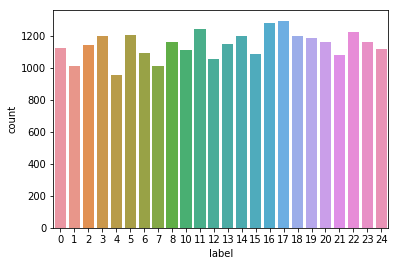

In [3]:
order = list(np.sort(train_data['label'].unique()))
print(order)
sns.countplot(train_data["label"])

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

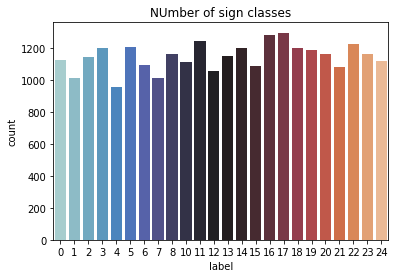

In [4]:
plt.plot(figure = (16,10))
g = sns.countplot( train_data["label"], palette = 'icefire')
plt.title('NUmber of sign classes')
train_data.label.astype('category').value_counts()

In [5]:
round(train_data.drop('label', axis=1).mean(), 2)

pixel1      145.42
pixel2      148.50
pixel3      151.25
pixel4      153.55
pixel5      156.21
pixel6      158.41
pixel7      160.47
pixel8      162.34
pixel9      163.95
pixel10     165.53
pixel11     166.69
pixel12     167.81
pixel13     168.50
pixel14     169.31
pixel15     169.96
pixel16     170.46
pixel17     170.72
pixel18     170.87
pixel19     170.81
pixel20     170.48
pixel21     169.98
pixel22     169.26
pixel23     168.14
pixel24     166.94
pixel25     165.77
pixel26     163.62
pixel27     161.93
pixel28     161.35
pixel29     147.15
pixel30     150.28
             ...  
pixel755    164.41
pixel756    163.49
pixel757    143.41
pixel758    144.19
pixel759    145.71
pixel760    147.66
pixel761    149.02
pixel762    148.67
pixel763    148.19
pixel764    147.30
pixel765    146.29
pixel766    144.03
pixel767    142.97
pixel768    139.77
pixel769    137.07
pixel770    135.28
pixel771    131.92
pixel772    130.23
pixel773    132.05
pixel774    135.29
pixel775    141.10
pixel776    

In [6]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Normalization

X = X/255.0
test_data = test_data/255.0

In [7]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

Model building

In [8]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [9]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")


accuracy: 0.9979361417991988 



In [10]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

C:\Users\Kshiti\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [11]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy: 0.9734126502367366 



In [12]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

In [13]:
# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]

In [14]:
# specify model
model = SVC(kernel="linear")

In [15]:
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)    

In [16]:
# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 13.2min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [17]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.110537,0.202249,2.761289,0.058407,5,0.01,"{'C': 5, 'gamma': 0.01}",0.992721,0.992714,0.993625,...,0.99399,0.001688,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,10.432056,0.514235,2.734527,0.029379,5,0.001,"{'C': 5, 'gamma': 0.001}",0.992721,0.992714,0.993625,...,0.99399,0.001688,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,11.097053,1.002004,2.896450,0.265790,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.992721,0.992714,0.993625,...,0.99399,0.001688,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,10.409567,0.193195,2.922880,0.117322,10,0.01,"{'C': 10, 'gamma': 0.01}",0.992721,0.992714,0.993625,...,0.99399,0.001688,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,11.438548,1.321803,2.976408,0.230910,10,0.001,"{'C': 10, 'gamma': 0.001}",0.992721,0.992714,0.993625,...,0.99399,0.001688,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,13.997952,1.763161,3.404295,0.574084,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.992721,0.992714,0.993625,...,0.99399,0.001688,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [19]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9939901657257331 corresponding to hyperparameters {'C': 5, 'gamma': 0.01}


In [21]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="linear")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")

accuracy 0.9979361417991988 

